<a href="https://colab.research.google.com/github/BharadwajDinesh/ML-Lab/blob/main/Logistic_Regression_ML_Lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,log_loss
import matplotlib.pyplot as plt
import numpy as np


In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1]:
# We'll classify 'setosa' (0) vs 'versicolor' (1), excluding 'virginica' (2).
X_binary = X[y != 2]
y_binary = y[y != 2]

print("Features (X):")
display(X_binary.head())
print("Target (y):")
display(y_binary.head())

Features (X):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target (y):


,0
0,0
1,0
2,0
3,0
4,0


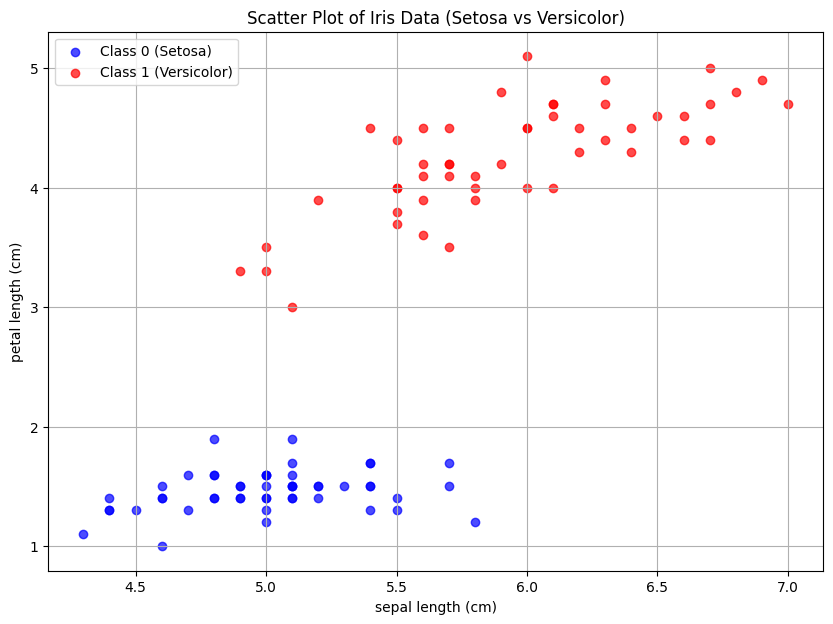

In [25]:
import matplotlib.pyplot as plt

# Get feature names for plotting labels
feature_names = X_binary.columns

# Choose two features to plot
feature_x_index = 0 # e.g., 'sepal length (cm)'
feature_y_index = 2 # e.g., 'petal length (cm)'

plt.figure(figsize=(10, 7))

# Scatter plot for class 0 (Setosa)
plt.scatter(
    X_binary[y_binary == 0].iloc[:, feature_x_index],
    X_binary[y_binary == 0].iloc[:, feature_y_index],
    color='blue',
    label='Class 0 (Setosa)',
    alpha=0.7
)

# Scatter plot for class 1 (Versicolor)
plt.scatter(
    X_binary[y_binary == 1].iloc[:, feature_x_index],
    X_binary[y_binary == 1].iloc[:, feature_y_index],
    color='red',
    label='Class 1 (Versicolor)',
    alpha=0.7
)

plt.xlabel(feature_names[feature_x_index])
plt.ylabel(feature_names[feature_y_index])
plt.title('Scatter Plot of Iris Data (Setosa vs Versicolor)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [13]:
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


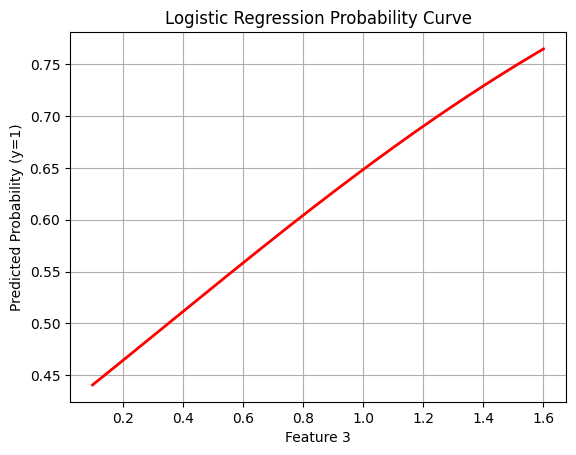

In [22]:
feature_index = 3  # choose the feature to plot (0,1,2,3)

# Create range for the selected feature
X_range = np.linspace(
    X_train.iloc[:, feature_index].min(),
    X_train.iloc[:, feature_index].max(),
    300
)

# Start with a row of mean values for all features
X_base = X_train.mean(axis=0)

# Repeat this row for all points
X_plot = np.tile(X_base, (300, 1))

# Replace only the chosen feature with the range
X_plot[:, feature_index] = X_range

# Predict probabilities
y_prob = model.predict_proba(X_plot)[:, 1]

# Plot
plt.plot(X_range, y_prob, color='red', linewidth=2)
plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Predicted Probability (y=1)")
plt.title("Logistic Regression Probability Curve")
plt.grid(True)
plt.show()

In [14]:
# Get the intercept (beta_0) and coefficients (beta_1 for each feature)
intercept = model.intercept_[0]
coefficients = model.coef_[0]

feature_names = X_binary.columns

print(f"Intercept (β0): {intercept:.4f}")
print("Coefficients (β1 for each feature):")
for i, coef in enumerate(coefficients):
    print(f"  {feature_names[i]}: {coef:.4f}")

Intercept (β0): -0.2508
Coefficients (β1 for each feature):
  sepal length (cm): -0.3587
  sepal width (cm): -1.3619
  petal length (cm): 2.0904
  petal width (cm): 0.9444


In [23]:
# Get probability predictions for the test set
y_pred_proba = model.predict_proba(X_test)

# Calculate log loss
current_log_loss = log_loss(y_test, y_pred_proba)

print(f"Log Loss: {current_log_loss:.4f}")

Log Loss: 0.0251


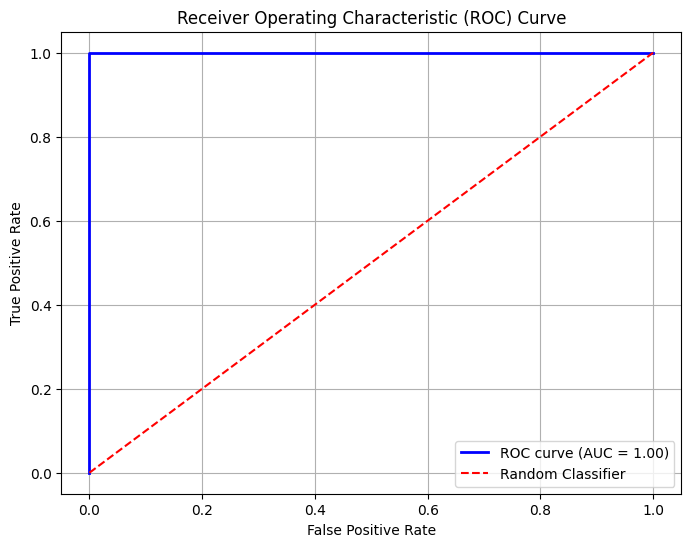

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class (class 1)
y_pred_proba_positive = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()